<a href="https://colab.research.google.com/github/NafiseKian/logistic_regression_classification/blob/main/project_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Malignant and Benign Cancer Detection**

You have to implement binary classification algorithm. The tasks are given below. Everything must be implemented from scracth using only Python basics (such as loops, functions, and so on) and numpy arrays.

It is forbidden to use any ML libraries.


**Tasks:**

* Implement polynomial features [10p]
* Implement minmax normalisation [10p]
* Implement logistic regression loss function and gradient descent algorithm [10p]
* Plot learning and test curve [10p]
* Generate test prediction (test dataset) [10p]
* Fill the confusion matrix (test dataset) [10p]
* Compute F1 score, precision, recall and accuracy using confusion matrix (test dataset) [10p]
* Try various learning rate and compute F1 score of each learning rate (test dataset) [10p]
* Learning rates: (0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.001, 0.01, 0.05, 0.09, 0.1, 0.4, 0.7) [10p]
* Generate the lists for each learning rate and its associated F1 score and plot (test dataset) [10p]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the data file
df = pd.read_csv('cancer_data.csv')
df.head() # diplay first 5 rows

# remove some of the columns because we don't need
df.drop('Unnamed: 32', inplace = True, axis = 1)
df.drop('id', inplace=True, axis=1)

# target output is a string, replace them to be integer values
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
print(df.head())

print()

# display the columns' title
columns_title=list(df.columns)
print(columns_title)

# convert to numpy
data=df.to_numpy()

# split inputs and output data
data_in=data[:,1:] #input
data_out=data[:,0] #output (m,) vector

# print first 5 rows of outputs
print(data_out[:5])

# reshape data_out to match with the predicted output
data_out = np.reshape(data_out,(-1,1)) # dimension becomes (m,1)

# delete unnecesary variables to save some memory in Colab
del data, df

# display the shape of inputs and outputs
print(f"input dim:{data_in.shape}")
print(f"output dim:{data_out.shape}")

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [4]:
# split data into training and test sets

ratio = 0.7 # percentage of training dataset

len_tr = int(ratio*len(data_in)) # data_in.shape[0]

# training dataset
tr_data_in = data_in[:len_tr]
tr_data_out = data_out[:len_tr]

# test dataset
test_data_in = data_in[len_tr:]
test_data_out = data_out[len_tr:]

# display the shape of inputs and outputs
print(f"number of train data: {tr_data_in.shape}")
print(f"number of test data: {test_data_in.shape}")

number of train data: (398, 30)
number of test data: (171, 30)


In [5]:
# task 1 : polynomial features

#I wrote a function to calculate the polynomial according to the power you give to it
def add_polynomial (data , power):
  new_features = []
  m,n = data.shape
  for i in range (n):
    for p in range (2 , power+1):
      new_feature = data[:, i] ** p
      new_features.append(new_feature)

  data_with_poly_features = np.column_stack([data] + new_features)
  return data_with_poly_features


tr_data_in_poly = add_polynomial(tr_data_in, 2)
print(f"Number of train data with polynomial features: {tr_data_in_poly.shape}")
print(tr_data_in_poly[:2, :])

Number of train data with polynomial features: (398, 60)
[[1.7990000e+01 1.0380000e+01 1.2280000e+02 1.0010000e+03 1.1840000e-01
  2.7760000e-01 3.0010000e-01 1.4710000e-01 2.4190000e-01 7.8710000e-02
  1.0950000e+00 9.0530000e-01 8.5890000e+00 1.5340000e+02 6.3990000e-03
  4.9040000e-02 5.3730000e-02 1.5870000e-02 3.0030000e-02 6.1930000e-03
  2.5380000e+01 1.7330000e+01 1.8460000e+02 2.0190000e+03 1.6220000e-01
  6.6560000e-01 7.1190000e-01 2.6540000e-01 4.6010000e-01 1.1890000e-01
  3.2364010e+02 1.0774440e+02 1.5079840e+04 1.0020010e+06 1.4018560e-02
  7.7061760e-02 9.0060010e-02 2.1638410e-02 5.8515610e-02 6.1952641e-03
  1.1990250e+00 8.1956809e-01 7.3770921e+01 2.3531560e+04 4.0947201e-05
  2.4049216e-03 2.8869129e-03 2.5185690e-04 9.0180090e-04 3.8353249e-05
  6.4414440e+02 3.0032890e+02 3.4077160e+04 4.0763610e+06 2.6308840e-02
  4.4302336e-01 5.0680161e-01 7.0437160e-02 2.1169201e-01 1.4137210e-02]
 [2.0570000e+01 1.7770000e+01 1.3290000e+02 1.3260000e+03 8.4740000e-02
  7.86

In [6]:
# task 2 : minmax normalization

def min_max_norm (data):
  min_vals = np.min(data, axis=0)
  max_vals = np.max(data, axis=0)
  norm_data = (data - min_vals) / (max_vals - min_vals)
  return norm_data

tr_data_in_poly_normalized = min_max_norm(tr_data_in_poly)
print(tr_data_in_poly_normalized[:2, :])

[[0.52103744 0.0226581  0.54598853 0.3640416  0.68000973 0.7920373
  0.70313964 0.73111332 0.66844634 0.60551811 0.35614702 0.12046941
  0.3690336  0.28198282 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.69246032 0.14152452 0.75012578 0.56480227
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396
  0.37077387 0.00929172 0.39156326 0.157671   0.59369992 0.64482493
  0.49440536 0.53452669 0.56977623 0.52857541 0.14397433 0.02906544
  0.15169055 0.08500743 0.03934495 0.13093837 0.01840956 0.09037546
  0.13606841 0.0422117  0.5617597  0.06747473 0.6302494  0.3441715
  0.47754049 0.39537905 0.32331759 0.83179415 0.44984999 0.27750894]
 [0.64314449 0.27257355 0.61578329 0.50201656 0.27047086 0.18176799
  0.20360825 0.34875746 0.34436733 0.14132266 0.15643672 0.08258929
  0.12444047 0.1289653  0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.67698413 0.30357143 0.60590307 0.54539855
  0.34755332 0.15456336 0.19297125 0.63917526 0.2

In [7]:
#task 3 : logistic regression loss function and gradient descent algorithm

max_epoch = 1000
err = [] #errors
w = np.zeros((1,data_in.shape[1]))
b = 0
print(f"w:{w}")
print(f"b:{b}")

def sigmoid(z): #sigmoid function
    return 1 / (1 + np.exp(-z))

def loss_function(pred, true):
    epsilon = 1e-15  # Small value to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid log(0) and log(1)
    return -np.mean(true * np.log(pred) + (1 - true) * np.log(1 - pred))

def gradient_descent():
    for epoch in range(max_epoch):

        print(f"epoch {epoch}/{max_epoch}")



w:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
b:0
epoch 0/1000
epoch 1/1000
epoch 2/1000
epoch 3/1000
epoch 4/1000
epoch 5/1000
epoch 6/1000
epoch 7/1000
epoch 8/1000
epoch 9/1000
epoch 10/1000
epoch 11/1000
epoch 12/1000
epoch 13/1000
epoch 14/1000
epoch 15/1000
epoch 16/1000
epoch 17/1000
epoch 18/1000
epoch 19/1000
epoch 20/1000
epoch 21/1000
epoch 22/1000
epoch 23/1000
epoch 24/1000
epoch 25/1000
epoch 26/1000
epoch 27/1000
epoch 28/1000
epoch 29/1000
epoch 30/1000
epoch 31/1000
epoch 32/1000
epoch 33/1000
epoch 34/1000
epoch 35/1000
epoch 36/1000
epoch 37/1000
epoch 38/1000
epoch 39/1000
epoch 40/1000
epoch 41/1000
epoch 42/1000
epoch 43/1000
epoch 44/1000
epoch 45/1000
epoch 46/1000
epoch 47/1000
epoch 48/1000
epoch 49/1000
epoch 50/1000
epoch 51/1000
epoch 52/1000
epoch 53/1000
epoch 54/1000
epoch 55/1000
epoch 56/1000
epoch 57/1000
epoch 58/1000
epoch 59/1000
epoch 60/1000
epoch 61/1000
epoch 62/1000
epoch 63/1000
epoch 64/100

In [ ]:
# helper function to plot confusion matrix

def plot_conf_mat(conf_mat):

    class_label=["P","N"]

    plt.subplots(figsize=(8, 8))
    sns.set(font_scale=1.5) # Adjust the font to fit
    sns.heatmap(conf_mat,
                annot=True,
                cbar=False,
                xticklabels=class_label,
                yticklabels=class_label,
                cmap='Blues')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

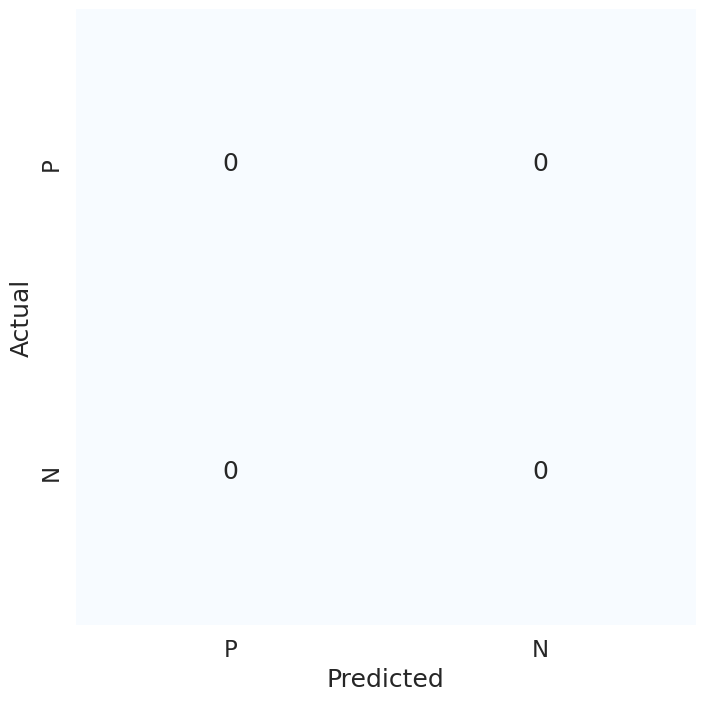

In [ ]:
conf_mat = np.zeros((2,2),dtype=int)
# you need to write algorithm here to update conf_mat
# you have to use test dataset

# plot the confusion matrix
plot_conf_mat(conf_mat)

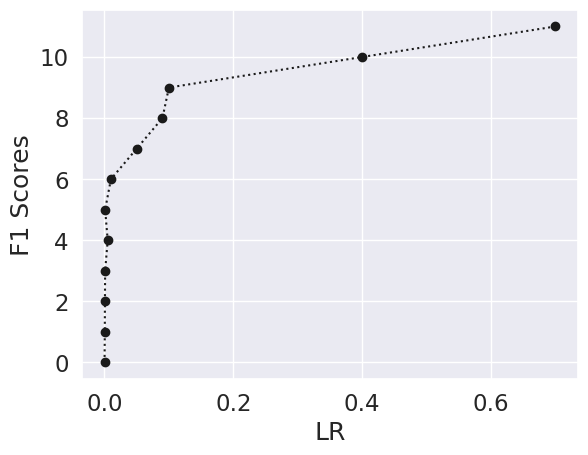

In [ ]:
# test each learning rate and obtained F1 score for each one,
# do experiments one by one and fill the F1 scores manually
# use test dataset

LR = [0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.001, 0.01, 0.05, 0.09, 0.1, 0.4, 0.7]
# you need to update F1_score_list
F1_score_list = [0,1,2,3,4,5,6,7,8,9,10,11]

plt.plot(LR, F1_score_list, 'o:k')
plt.xlabel("LR")
plt.ylabel("F1 Scores")
plt.show()